<a href="https://colab.research.google.com/github/JamesAttwood1910/Diplomado_USACH/blob/main/PCA_Modulo4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Tarea 2

In [ ]:
# Librerias 

import pandas as pd
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA


In [ ]:
# Conectar con google drive

In [ ]:

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Cargar datos

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Modulo4/Tarea 2-20210821/brandrating.csv")
data

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy,brand
0,2,4,8,8,2,9,7,4,6,a
1,1,1,4,7,1,1,1,2,2,a
2,2,3,5,9,2,9,5,1,6,a
3,1,6,10,8,3,4,5,2,1,a
4,1,1,5,8,1,9,9,1,1,a
...,...,...,...,...,...,...,...,...,...,...
995,2,2,3,6,4,8,5,1,2,j
996,3,2,6,7,1,3,3,2,1,j
997,1,1,10,10,1,6,5,5,2,j
998,1,1,7,5,1,1,2,5,1,j


In [ ]:
data_copy = data

In [ ]:
# Explorar datos

In [ ]:
data.head()

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy,brand
0,2,4,8,8,2,9,7,4,6,a
1,1,1,4,7,1,1,1,2,2,a
2,2,3,5,9,2,9,5,1,6,a
3,1,6,10,8,3,4,5,2,1,a
4,1,1,5,8,1,9,9,1,1,a


In [ ]:
data.info() # no hay valores faltantes, 9 variables int, 1 variable categorico (brand). 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   perform  1000 non-null   int64 
 1   leader   1000 non-null   int64 
 2   latest   1000 non-null   int64 
 3   fun      1000 non-null   int64 
 4   serious  1000 non-null   int64 
 5   bargain  1000 non-null   int64 
 6   value    1000 non-null   int64 
 7   trendy   1000 non-null   int64 
 8   rebuy    1000 non-null   int64 
 9   brand    1000 non-null   object
dtypes: int64(9), object(1)
memory usage: 78.2+ KB


In [ ]:
data.shape

(1000, 10)

In [ ]:
data['brand'].value_counts()

h    100
e    100
a    100
d    100
f    100
c    100
g    100
i    100
j    100
b    100
Name: brand, dtype: int64

In [ ]:
# Hacer brand la variable dependient (y) y sacarla de la base de datos. 

target = data['brand']
data = data.drop(['brand'], axis = 1)

In [ ]:
# 1 ) Realizar un heatmap de correlación entre los atributos

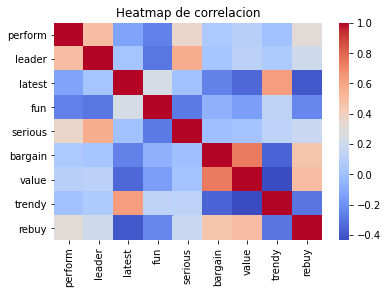

In [ ]:
corr = data.corr()

sns.heatmap(corr, cmap = 'coolwarm')
plt.title('Heatmap de correlacion')
plt.show()

In [ ]:
# 2) Calcular los componentes principales. ¿Cuál es la proporción de la
# varianza explicada acumulada hasta el componente principal 3? 

In [ ]:
scaler = StandardScaler()
new_data = scaler.fit_transform(data)

In [ ]:
#calcular los componentes principales

pca = PCA(n_components=3) #cuantas dimensiones de PCA
pca = pca.fit(new_data)
pca

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
#convertimos los datos en las nuevas dimensiones
pca3 = pca.transform(new_data)

In [ ]:
print(pca3)
print(pca3.shape)

[[ 1.01036278 -1.62300786  1.81527558]
 [-1.53720937 -1.83677187 -2.00276587]
 [ 1.21200083 -2.30192495  0.69760145]
 ...
 [-1.42307927 -2.09564259  1.43414192]
 [-2.08552324 -1.19425256 -1.27692351]
 [-1.50570199  0.47303273 -0.73876216]]
(1000, 3)


In [ ]:
# 9 componentes

pca_ = PCA(n_components=9) #cuantas dimensiones de PCA
pca_ = pca_.fit(new_data)
pca_

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca9 = pca_.transform(new_data)

In [ ]:
print(pca9)
print(pca9.shape)

[[ 1.01036278 -1.62300786  1.81527558 ...  0.55514877 -0.29133343
  -0.41593993]
 [-1.53720937 -1.83677187 -2.00276587 ...  0.28822721 -0.37788251
  -0.24118947]
 [ 1.21200083 -2.30192495  0.69760145 ...  0.32391032 -0.54390044
  -1.06393714]
 ...
 [-1.42307927 -2.09564259  1.43414192 ... -0.07968735 -0.52145708
  -0.02909572]
 [-2.08552324 -1.19425256 -1.27692351 ...  0.1358329  -0.24524473
   0.16700233]
 [-1.50570199  0.47303273 -0.73876216 ... -0.31377098 -0.30161079
   0.19153493]]
(1000, 9)


In [ ]:
#proporcion de la varianza explicada por cada PCA
print('varianza explicada PCA', pca3.shape)
expl = pca.explained_variance_ratio_
print(expl)

varianza explicada PCA (1000, 3)
[0.33103284 0.23295019 0.11991721]


In [ ]:
# 2) ¿Cuál es la proporción de la varianza explicada acumulada hasta el componente principal 3?

print('suma hasta componente principal 3:', sum(expl[0:3]))
print(expl[0:3])

# los tres componentes principales explican 68,39% de la varianca en los datos. 

suma hasta componente principal 3: 0.6839002346857314
[0.33103284 0.23295019 0.11991721]


In [ ]:
# 3) Grafique la varianza explicada para 9 componentes principales

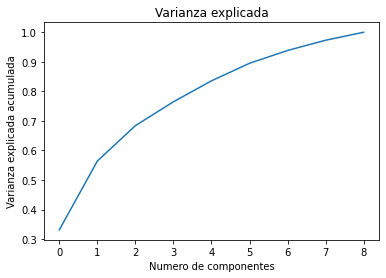

In [ ]:
plt.plot(np.cumsum(pca_.explained_variance_ratio_))
plt.title('Varianza explicada')
plt.xlabel('Numero de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.show()

In [ ]:
# 4) Crear un dataframe y heatmap con con los componentes principales y los
# atributos. ¿Qué significa que el valor en la celda "componente principal 2"
# / "leader", sea alto?¿Qué valor es?

In [ ]:
# reducir a dos componentes principales 

pca2 = PCA(n_components=2)
pca2.fit(new_data)
pca_2 = pca2.transform(new_data)

In [ ]:
# ver variance explicada por los 2 componentes principales: 

print('varianza explicada PCA', pca_2.shape)
expl2 = pca2.explained_variance_ratio_
print(expl2)
print('suma:', sum(expl2[0:2]))

varianza explicada PCA (1000, 2)
[0.33103284 0.23295019]
suma: 0.563983026406592


In [ ]:
pca2.components_

array([[ 0.23746787,  0.20582566, -0.37038063, -0.25106012,  0.1597402 ,
         0.39917306,  0.44745619, -0.35102924,  0.43901842],
       [ 0.41991179,  0.52381901,  0.20145317, -0.25037973,  0.51047254,
        -0.21849698, -0.18980822,  0.31849032,  0.01509832]])

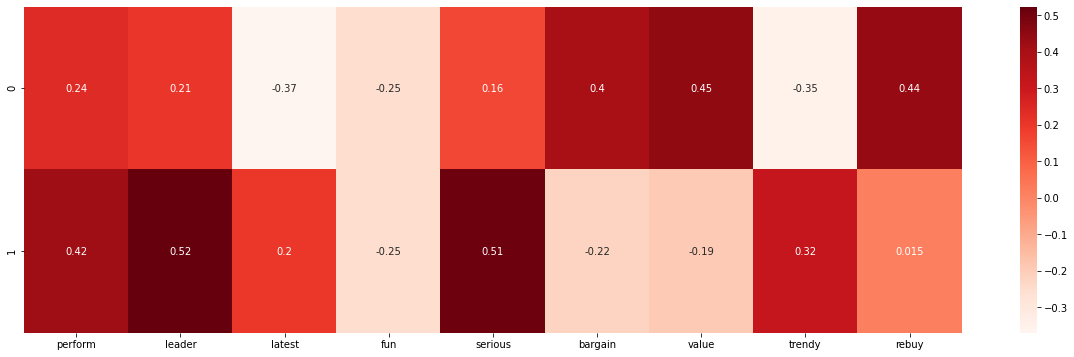

In [ ]:
# 4.1) Crear base de datos y hacer heatmap de los 2 componentes principales 

data_pca2 = pd.DataFrame(pca2.components_, columns=data.columns)
plt.figure(figsize=(21,6))
sns.heatmap(data_pca2, cmap='Reds', annot = True)

In [ ]:
4.2) # ¿Qué significa que el valor en la celda "componente principal 2  / "leader", sea alto?¿Qué valor es? ( 2 puntos)

# la celda tiene un valor de 0.52, eso dice que la variable de leader es la variable que mas aporta a PC2. 

In [ ]:
# 5) Utilizando el promedio como agregación ¿Cuáles son los atributos dónde la marca e es mejor que la marca a?

In [ ]:
data_copy.head()

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy,brand
0,2,4,8,8,2,9,7,4,6,a
1,1,1,4,7,1,1,1,2,2,a
2,2,3,5,9,2,9,5,1,6,a
3,1,6,10,8,3,4,5,2,1,a
4,1,1,5,8,1,9,9,1,1,a


In [ ]:
df = data_copy.groupby('brand').mean() 

df.iloc[[0,4]]
# la marca e es mejor que la marca a en los atributos de perform, leader, latest, serious, bargain, value, trendy, y rebuy. 

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
brand,,,,,,,,,
a,1.65,3.04,7.46,7.87,1.77,4.83,4.78,3.78,2.21
e,2.68,4.92,7.60,6.88,4.44,5.73,5.34,5.60,3.82
